In [10]:
# Now we learn the implementation of the gradient decdent 
# it is sued to find the minima  theta
# eqn x=x+ndf(x)/dx

# Gradient Descent (in General)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
X=np.arange(10)
Y=(X-5)**2
print(X,Y)

[0 1 2 3 4 5 6 7 8 9] [25 16  9  4  1  0  1  4  9 16]


C:\Users\Vasudev\AppData\Local\Temp\ipykernel_39384\329019919.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


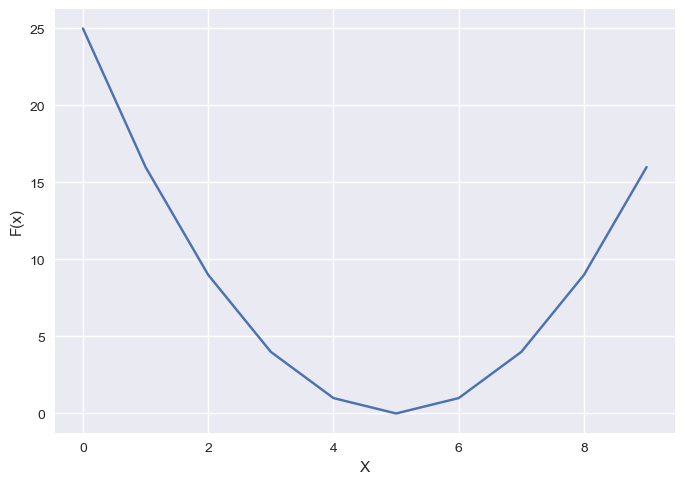

In [3]:
### Given a function f(x) we have to find the value of the x that miimizes 
## find the function that mimimizes the f
plt.style.use("seaborn")
plt.plot(X,Y)
plt.ylabel('F(x)')
plt.xlabel('X')
plt.show()

1.0
1.8
2.4400000000000004
2.9520000000000004
3.3616
3.68928
3.9514240000000003
4.1611392
4.32891136
4.4631290880000005
4.570503270400001
4.65640261632
4.725122093056
4.7800976744448
4.82407813955584
4.859262511644672
4.8874100093157375
4.90992800745259
4.927942405962073
4.942353924769658
4.953883139815726
4.9631065118525814
4.9704852094820655
4.976388167585652
4.981110534068522
4.984888427254818
4.987910741803854
4.990328593443083
4.992262874754466
4.993810299803573
4.995048239842858
4.996038591874287
4.996830873499429
4.9974646987995435
4.997971759039634
4.9983774072317075
4.998701925785366
4.998961540628293
4.999169232502634
4.999335386002107
4.999468308801686
4.9995746470413485
4.999659717633079
4.9997277741064625
4.99978221928517
4.999825775428136
4.999860620342509
4.999888496274007
4.999910797019206
4.999928637615365


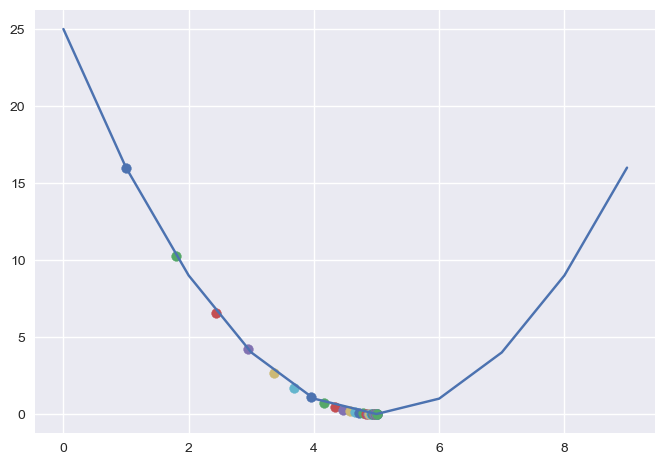

In [4]:
x=0
lr=0.1 #it is u means the constant 
error=[]# we want to store the value of error t each iteration
# take the 50 steps in the downward direction
plt.plot(X,Y)
for i in range(50):
    # you can see from above clearly gradient of the given function
    grad=2*(x-5)
    x=x-lr*grad
    y=(x-5)**2
    error.append(y)
    plt.scatter(x,y)
    print(x)

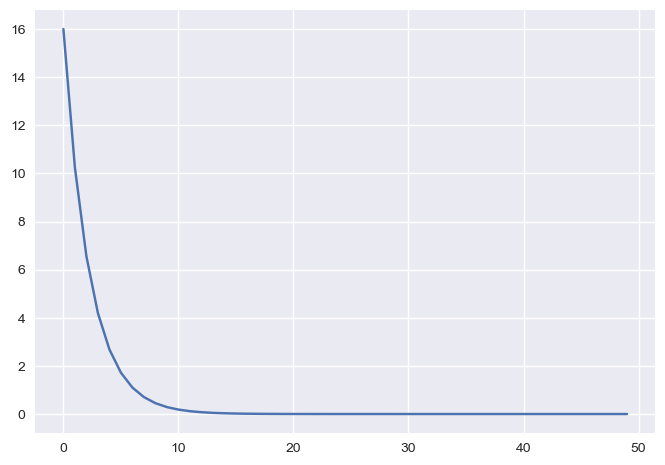

In [5]:
# Now seeing how the value of error changing overtime
plt.plot(error)
plt.show()

In [6]:
# data Preparation challenge for the hardwork pays off
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

### section 1 load and visulize the data
-Download
-Load
-Visualize
-Normalization

In [7]:
X=pd.read_csv('Linear_X_Train.csv')
Y=pd.read_csv('Linear_Y_Train.csv')

In [8]:
X

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043
...,...
3745,-0.100992
3746,1.349197
3747,-0.305164
3748,1.675833


In [9]:
Y

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187
...,...
3745,-13.530595
3746,114.741657
3747,-34.983275
3748,145.206092


C:\Users\Vasudev\AppData\Local\Temp\ipykernel_39384\3686061482.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


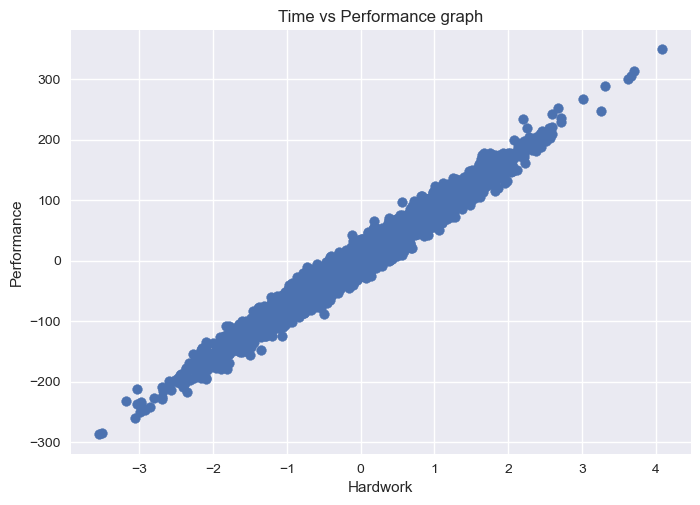

In [10]:
#visualize the data
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.title("Time vs Performance graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [11]:
X.shape

(3750, 1)

In [12]:
Y.shape

(3750, 1)

In [13]:
# convert x and y into numpy arrays
X=X.values
Y=Y.values

In [14]:
X 

array([[-0.28930742],
       [-0.58880963],
       [ 1.02750749],
       ...,
       [-0.30516366],
       [ 1.67583291],
       [-0.49175724]])

In [15]:
Y


array([[-9.11011171e-02],
       [-5.34677208e+01],
       [ 7.54570088e+01],
       ...,
       [-3.49832749e+01],
       [ 1.45206092e+02],
       [-1.71244939e+01]])

In [16]:
 # printing the mean and standard deviation
u=X.mean()
std=X.std()
X=X-u/std # normalize the data

In [17]:
u

-0.03779466168006854

In [18]:
std

0.9920801322508517

In [19]:
X

array([[-0.25121104],
       [-0.55071325],
       [ 1.06560387],
       ...,
       [-0.26706728],
       [ 1.71392929],
       [-0.45366086]])

# Section 2 - Linear Regression

In [70]:
# we know the formula for y^i= thetanot + theta1 *x
def  hypothesis(x,theta):
    # theta=[theta0,theta1]
    y_= theta[0]+theta[1]*x
    return y_
# Now we are difining the function to find the gradient descendent
def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        y_=hypothesis(X[i],theta)
        y=Y[i]
        grad[0]+=(y_-y)
        grad[1]+=(y_-y)*X[i]
    return grad/m
# function that compute the error
def error(X,Y,theta):
    m=X.shape[0]
    total_error=0.0
    for i in range(m):
        y_=hypothesis(X[i],theta)
        total_error+=(y_-Y[i])**2
    return total_error/m
def gradientDescent(X,Y,max_steps=100,learning_rate=0.1):
    theta=np.zeros((2,))
    error_list=[]
    for i in range(max_steps):
        e=error(X,Y,theta)
        error_list.append(e)
        #Compute the gradient
        grad=gradient(X,Y,theta)
        # update theta
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
    return theta,error_list

In [71]:
theta,error_list=gradientDescent(X,Y)

In [72]:
theta

array([ 0.65955779, 80.54108304])

In [74]:
error_list

[array([6576.35005246]),
 array([5381.26741872]),
 array([4409.85503075]),
 array([3620.25102367]),
 array([2978.42835231]),
 array([2456.72843485]),
 array([2032.6692382]),
 array([1687.97644084]),
 array([1407.79592221]),
 array([1180.05364169]),
 array([994.93532204]),
 array([844.46351458]),
 array([722.15382049]),
 array([622.73545331]),
 array([541.92410066]),
 array([476.23729689]),
 array([422.84435039]),
 array([379.44435834]),
 array([344.16705206]),
 array([315.49220005]),
 array([292.18409544]),
 array([273.23830472]),
 array([257.83838287]),
 array([245.32068971]),
 array([235.14579109]),
 array([226.87521269]),
 array([220.15254446]),
 array([214.6880816]),
 array([210.24634007]),
 array([206.63590873]),
 array([203.70120069]),
 array([201.31574851]),
 array([199.3767542]),
 array([197.80065932]),
 array([196.51954412]),
 array([195.47820062]),
 array([194.63175347]),
 array([193.94372615]),
 array([193.38446903]),
 array([192.92988166]),
 array([192.5603742]),
 array([19

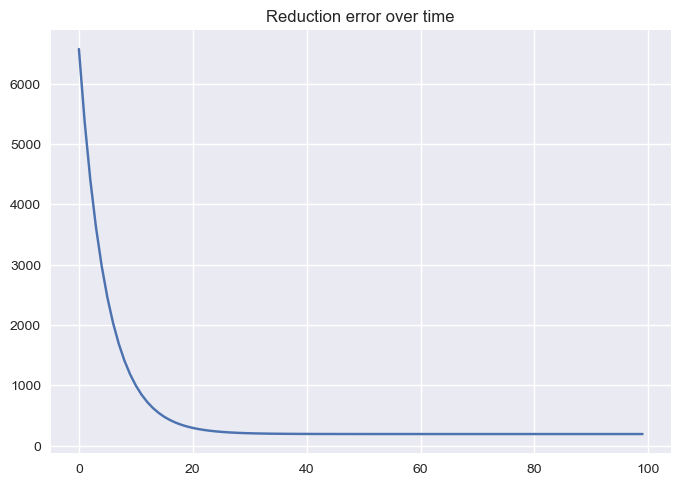

In [76]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

# Section -3 Predicitions and Best Line


In [77]:
y_=hypothesis(X,theta)

In [80]:
# so we can get the entire set of prediction in a single function call
y_


array([[-19.5732512 ],
       [-43.69548396],
       [ 86.48444761],
       ...,
       [-20.8503299 ],
       [138.70127923],
       [-35.87877903]])

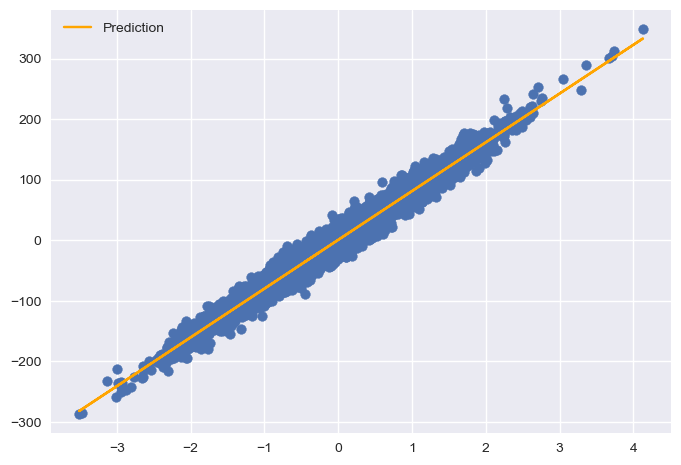

In [86]:
# Traning data and predictio 
plt.scatter(X,Y)
plt.plot(X,y_,color='orange',label="Prediction")
plt.legend()
plt.show()

In [87]:
# Load the test data
X_test=pd.read_csv("11.csv")
Y_test=pd.read_csv("14.csv")

In [89]:
X_test.shape

(1250, 1)

In [90]:
Y_test.shape

(1250, 1)

In [91]:
y_test=hypothesis(X_test,theta)

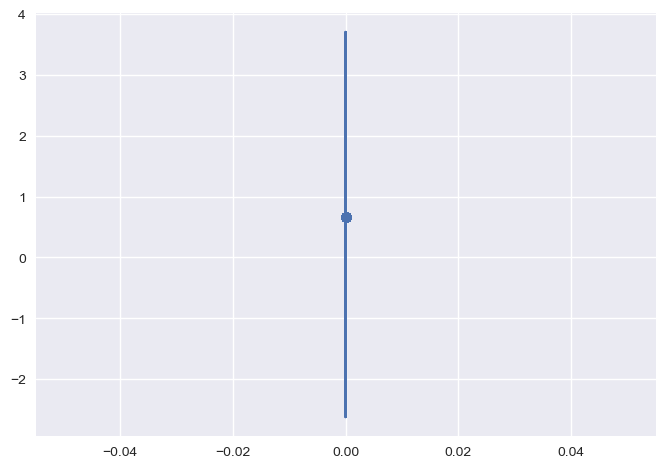

In [92]:
plt.plot(X_test,Y_test)
plt.scatter(X_test,y_test)


In [93]:
df=pd.DataFrame(data=y_test,columns=["y"])

In [94]:
df.to_csv('y_prediction.csv',index=False)

# Section -4 Computing Score
Score : 2 (R-squared) or Cofficent of determination
    the R2 score will tell us that how good our linear regression algorithm is performing
    

In [95]:
# Now we are going to check the accuracy of the model

In [96]:
def r2_score(Y,y_):
    # instead of using loop np.sum() is recommended
    num=np.sum((Y-y_)**2)
    denom=np.sum((Y-Y.mean())**2)
    score=1-num/denom
    return score*100

In [97]:
r2_score(Y,y_)

97.09612224098834

# Surface plots and data visualization
Surface plots are used to
-visualize loss function in machine learning and deep leaning
-visualize state or state value fubtion in reinforcement learning


In [31]:
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# a=np.array([1,2,3])
# b=np.array([4,5,6,7])

a=np.arange(-1,1,0.02)
b=a
print(a)

[-1.0000000e+00 -9.8000000e-01 -9.6000000e-01 -9.4000000e-01
 -9.2000000e-01 -9.0000000e-01 -8.8000000e-01 -8.6000000e-01
 -8.4000000e-01 -8.2000000e-01 -8.0000000e-01 -7.8000000e-01
 -7.6000000e-01 -7.4000000e-01 -7.2000000e-01 -7.0000000e-01
 -6.8000000e-01 -6.6000000e-01 -6.4000000e-01 -6.2000000e-01
 -6.0000000e-01 -5.8000000e-01 -5.6000000e-01 -5.4000000e-01
 -5.2000000e-01 -5.0000000e-01 -4.8000000e-01 -4.6000000e-01
 -4.4000000e-01 -4.2000000e-01 -4.0000000e-01 -3.8000000e-01
 -3.6000000e-01 -3.4000000e-01 -3.2000000e-01 -3.0000000e-01
 -2.8000000e-01 -2.6000000e-01 -2.4000000e-01 -2.2000000e-01
 -2.0000000e-01 -1.8000000e-01 -1.6000000e-01 -1.4000000e-01
 -1.2000000e-01 -1.0000000e-01 -8.0000000e-02 -6.0000000e-02
 -4.0000000e-02 -2.0000000e-02  8.8817842e-16  2.0000000e-02
  4.0000000e-02  6.0000000e-02  8.0000000e-02  1.0000000e-01
  1.2000000e-01  1.4000000e-01  1.6000000e-01  1.8000000e-01
  2.0000000e-01  2.2000000e-01  2.4000000e-01  2.6000000e-01
  2.8000000e-01  3.00000

In [33]:
a,b=np.meshgrid(a,b)
print(a)
print(b)

[[-1.   -0.98 -0.96 ...  0.94  0.96  0.98]
 [-1.   -0.98 -0.96 ...  0.94  0.96  0.98]
 [-1.   -0.98 -0.96 ...  0.94  0.96  0.98]
 ...
 [-1.   -0.98 -0.96 ...  0.94  0.96  0.98]
 [-1.   -0.98 -0.96 ...  0.94  0.96  0.98]
 [-1.   -0.98 -0.96 ...  0.94  0.96  0.98]]
[[-1.   -1.   -1.   ... -1.   -1.   -1.  ]
 [-0.98 -0.98 -0.98 ... -0.98 -0.98 -0.98]
 [-0.96 -0.96 -0.96 ... -0.96 -0.96 -0.96]
 ...
 [ 0.94  0.94  0.94 ...  0.94  0.94  0.94]
 [ 0.96  0.96  0.96 ...  0.96  0.96  0.96]
 [ 0.98  0.98  0.98 ...  0.98  0.98  0.98]]


In [34]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [35]:
# as the projection keyword is not working we will simply write the code
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(a,b,a+b,cmap='coolwarm')
plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 800x550 with 0 Axes>

In [36]:
# instead of linear surface we make a 2d surfacce
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(a,b,a**2+b**2,cmap='coolwarm')
plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 800x550 with 0 Axes>

AttributeError: 'Axes' object has no attribute 'plot_surface'

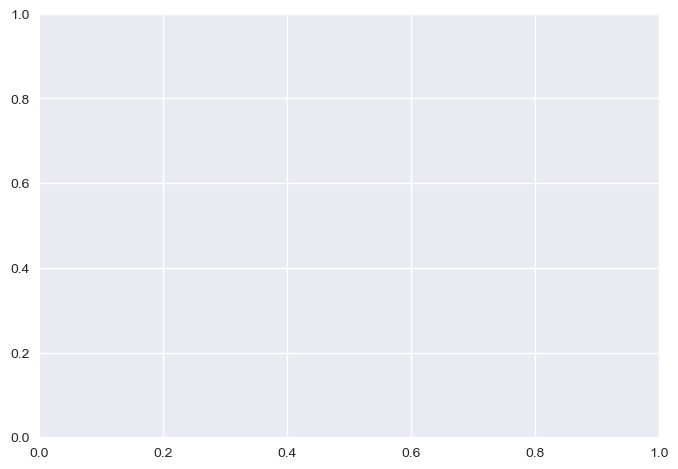

In [43]:
from mpl_toolkits.mpl3d import Axes3D
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(a,b,a**2+b**2,cmap='rainbow')
plt.title('COntour plot')
plt.show()